In [8]:
working_dir = '/mnt/c/users/fordd/Downloads/RW_PGM_FE/'
py_files_dir =  working_dir+'py_files/'
#saved_arrays_dir = working_dir+'saved_arrays/'
#saved_models_dir = working_dir+'saved_models/'
pdb_files_dir = working_dir+'pdb_files/'
trajectory_files_dir = working_dir+'trajectory_files/'

In [9]:
import os

os.chdir(py_files_dir)

from utils import *

os.chdir(working_dir)

In [10]:
import matplotlib as mpl
mpl.rc('xtick', labelsize=11) 
mpl.rc('ytick', labelsize=11) 
plt.style.use('classic')
%matplotlib inline
fontname = 'Times New Roman'
plt.rcParams["font.family"] = fontname
plt.rcParams['font.size'] = 15
default_colours = [
'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]
plt.rcParams['font.size'] = 14

None of these (classical) WTmetaD biased simulations converge very cleanly to some precise set of FE differences between metastable states. WTmetaD parameters were tweaked, but not many times, since this is a computationally costly endeavour. After the FE estimates start to oscillate around a certain consistent position, average was taken, and called ‘ground truth’.

# AD300b

In [13]:
get_labels_ = get_labels_from_CVs_alanine_dipeptide_
clustering_function_ = lambda xyz : get_labels_(get_torsional_CVs_(xyz,inds_CVs)) 

T = 300 # K
PDB = pdb_files_dir+'alanine-dipeptide-in-vacuum.pdb'
inds_CVs = [[4, 6, 8, 14], [6, 8, 14, 16]]
FF_name = "amber99sbildn.xml"
smiv = Single_Molecule_In_Vaccum(PDB,
                                 FF=FF_name,
                                 default_temperature=T)

path_dataset = trajectory_files_dir+'/AD'+str(T)+'b'
smiv.load_simulation_data_(path_dataset)
CVs = smiv.s ; n_frames = CVs.shape[0]
metaD_weights = np.exp(smiv.v)
labels = get_labels_(CVs)
n_states = len(set(labels))

delta_f_states = deltaf_states_in_time_(labels,
                                       weights=metaD_weights,
                                       align=True) 
##
_from  = 50000
delta_f_ground_truth = delta_f_states[_from:].mean(0)
delta_f_ground_truth -= delta_f_ground_truth.min()
print(delta_f_ground_truth)
##
delta_f_states_aligned = delta_f_states-delta_f_states.min(-1,keepdims=True)
detaf_GT = delta_f_states_aligned[_from:].mean(0) 
detaf_GT -= detaf_GT.min()
print(detaf_GT)

using app.ForceField
# cpu cores will be used for evaluation: 16
loading ['AD_300K_500.0ns_FES(kT)', 'AD_300K_500.0ns_s', 'AD_300K_500.0ns_Tu', 'AD_300K_500.0ns_Tv', 'AD_300K_500.0ns_u', 'AD_300K_500.0ns_v', 'AD_300K_500.0ns_xyz']
FE estimates of state 2 (often the lowest FE) moved to around 0
[0.19308704 1.10727756 0.         2.86034197]
[0.19308704 1.10727756 0.         2.86034197]


In [14]:
# 0.19308704, 1.10727756, 0.        , 2.86034197

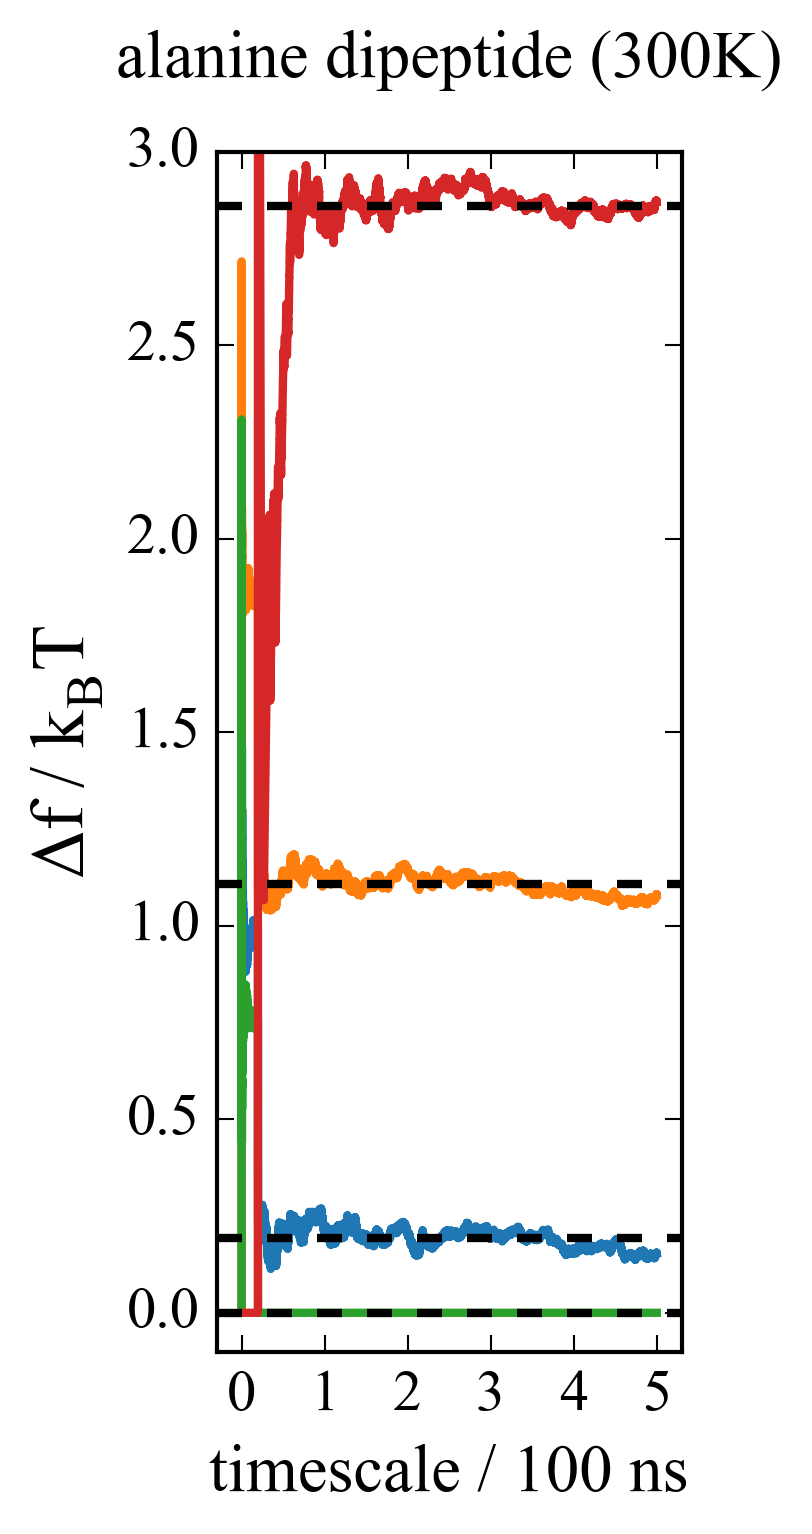

In [15]:
name = 'alanine dipeptide (300K)'
y_show = [-0.1,3.0]
plt.figure(figsize=(2,5),dpi=300, facecolor="white")
for k in range(n_states):
    plt.plot(delta_f_states_aligned[:,k],
             color=default_colours[k],
            linewidth=2)
pad_x = 30000
[plt.plot([-pad_x,n_frames+pad_x],[x]*2,'--',color='black',linewidth=2) for x in delta_f_ground_truth]
plt.xticks([0,100000,200000,300000,400000,500000],[0,1,2,3,4,5])
plt.xlabel('timescale / 100 ns', size=16)
plt.ylabel('Δf / $\mathregular{k_B}$T', labelpad=5, size=18)
plt.xlim(-pad_x,n_frames+pad_x)
plt.ylim(y_show[0],y_show[1])
plt.title(name, size=16, pad=18)
plt.show()

# AD600b

In [18]:
get_labels_ = get_labels_from_CVs_alanine_dipeptide_
clustering_function_ = lambda xyz : get_labels_(get_torsional_CVs_(xyz,inds_CVs)) 

T = 600 # K
PDB = pdb_files_dir+'alanine-dipeptide-in-vacuum.pdb'
inds_CVs = [[4, 6, 8, 14], [6, 8, 14, 16]]
FF_name = "amber99sbildn.xml"
smiv = Single_Molecule_In_Vaccum(PDB,
                                 FF=FF_name,
                                 default_temperature=T)

path_dataset = trajectory_files_dir+'AD'+str(T)+'b'
smiv.load_simulation_data_(path_dataset)
CVs = smiv.s ; n_frames = CVs.shape[0]
metaD_weights = np.exp(smiv.v)
labels = get_labels_(CVs)
n_states = len(set(labels))

delta_f_states = deltaf_states_in_time_(labels,
                                       weights=metaD_weights,
                                       align=True) 
##
_from  = 300000
delta_f_ground_truth = delta_f_states[_from:].mean(0)
delta_f_ground_truth -= delta_f_ground_truth.min()
print(delta_f_ground_truth)
##
delta_f_states_aligned = delta_f_states-delta_f_states.min(-1,keepdims=True)
detaf_GT = delta_f_states_aligned[_from:].mean(0) 
detaf_GT -= detaf_GT.min()
print(detaf_GT)

using app.ForceField
# cpu cores will be used for evaluation: 16
loading ['AD_600K_500.0ns_FES(kT)', 'AD_600K_500.0ns_s', 'AD_600K_500.0ns_Tu', 'AD_600K_500.0ns_Tv', 'AD_600K_500.0ns_u', 'AD_600K_500.0ns_v', 'AD_600K_500.0ns_xyz']
FE estimates of state 0 (often the lowest FE) moved to around 0
[0.02390266 0.31251421 0.         1.74955772]
[0.02390266 0.31251421 0.         1.74955772]


In [19]:
# 0.02390266, 0.31251421, 0.        , 1.74955772

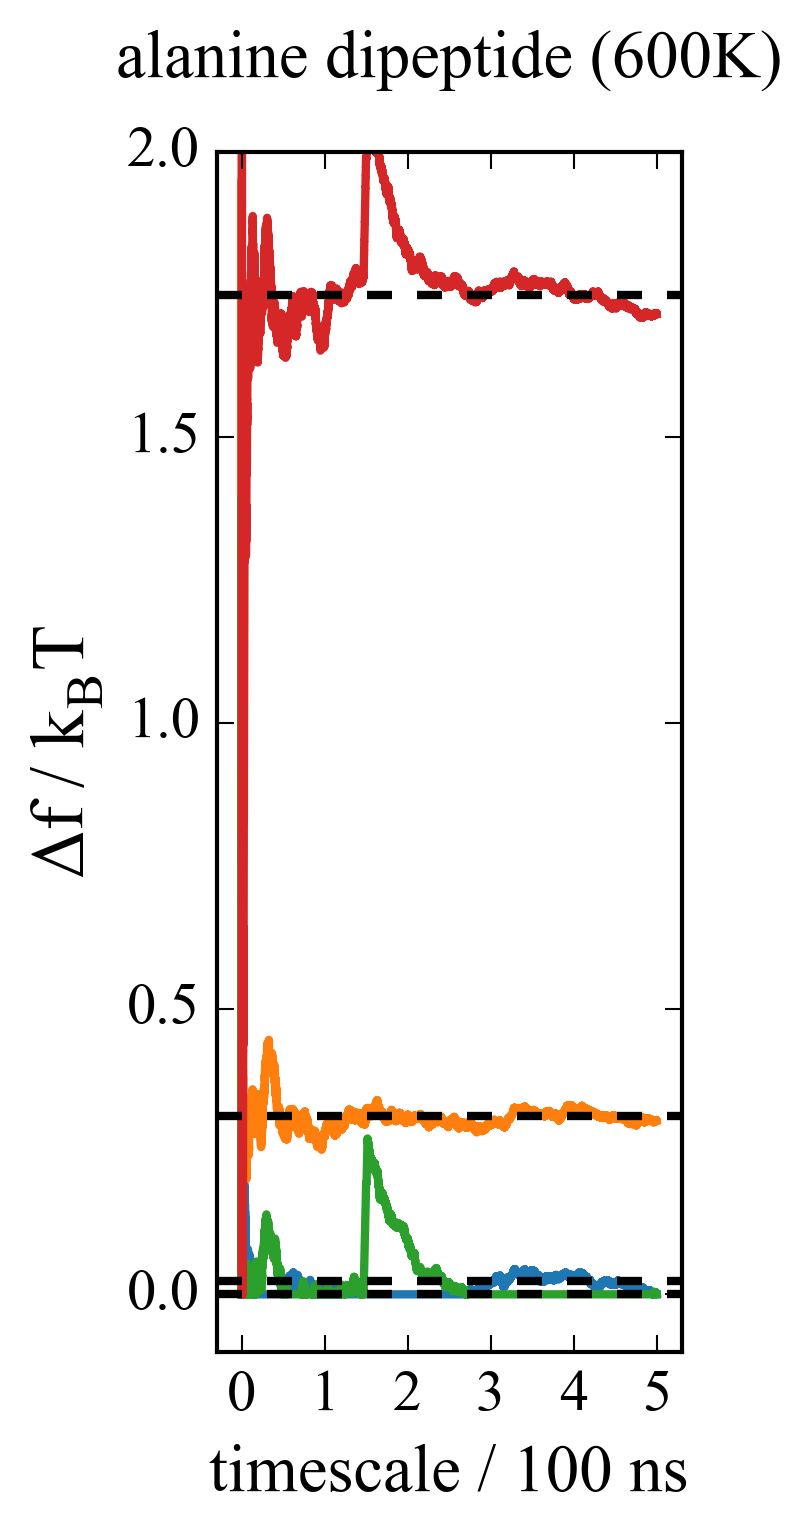

In [20]:
name = 'alanine dipeptide (600K)'
y_show = [-0.1,2.0]
plt.figure(figsize=(2,5),dpi=300, facecolor="white")
for k in range(n_states):
    plt.plot(delta_f_states_aligned[:,k],
             color=default_colours[k],
            linewidth=2)
pad_x = 30000
[plt.plot([-pad_x,n_frames+pad_x],[x]*2,'--',color='black',linewidth=2) for x in delta_f_ground_truth]
plt.xticks([0,100000,200000,300000,400000,500000],[0,1,2,3,4,5])
plt.xlabel('timescale / 100 ns', size=16)
plt.ylabel('Δf / $\mathregular{k_B}$T', labelpad=5, size=18)
plt.xlim(-pad_x,n_frames+pad_x)
plt.ylim(y_show[0],y_show[1])
plt.title(name, size=16, pad=18)
plt.show()

# IB300b

In [23]:
get_labels_ = get_labels_from_CVs_ibuprofen_
clustering_function_ = lambda xyz : get_labels_(get_torsional_CVs_(xyz,inds_CVs)) 

T = 300 # K
PDB = pdb_files_dir+'ibuprofen-in-vacuum.pdb'
inds_CVs = [[13, 10, 3, 1], [4, 3, 1, 0]]
FF_name = pdb_files_dir+'ibuprofen-in-vacuum-system.prmtop'
smiv = Single_Molecule_In_Vaccum(PDB,
                                 FF=FF_name,
                                 default_temperature=T)

path_dataset = trajectory_files_dir+'IB'+str(T)+'b'
smiv.load_simulation_data_(path_dataset)
CVs = smiv.s ; n_frames = CVs.shape[0]
metaD_weights = np.exp(smiv.v)
labels = get_labels_(CVs)
n_states = len(set(labels))

delta_f_states = deltaf_states_in_time_(labels,
                                       weights=metaD_weights,
                                       align=True) 
##
_from  = 200000
delta_f_ground_truth = delta_f_states[_from:].mean(0)
delta_f_ground_truth -= delta_f_ground_truth.min()
print(delta_f_ground_truth)
##
delta_f_states_aligned = delta_f_states-delta_f_states.min(-1,keepdims=True)
detaf_GT = delta_f_states_aligned[_from:].mean(0) 
detaf_GT -= detaf_GT.min()
print(detaf_GT)

using app.AmberPrmtopFile
# cpu cores will be used for evaluation: 16
loading ['IB_300K_1000.0ns_FES(kT)', 'IB_300K_1000.0ns_s', 'IB_300K_1000.0ns_Tu', 'IB_300K_1000.0ns_Tv', 'IB_300K_1000.0ns_u', 'IB_300K_1000.0ns_v', 'IB_300K_1000.0ns_xyz']
FE estimates of state 3 (often the lowest FE) moved to around 0
[0.0242205  0.00768604 0.01645141 0.         1.31893825 1.30793731]
[0.0242205  0.00768604 0.01645141 0.         1.31893825 1.30793731]


In [24]:
# 0.0242205 , 0.00768604, 0.01645141, 0.        , 1.31893825, 1.30793731

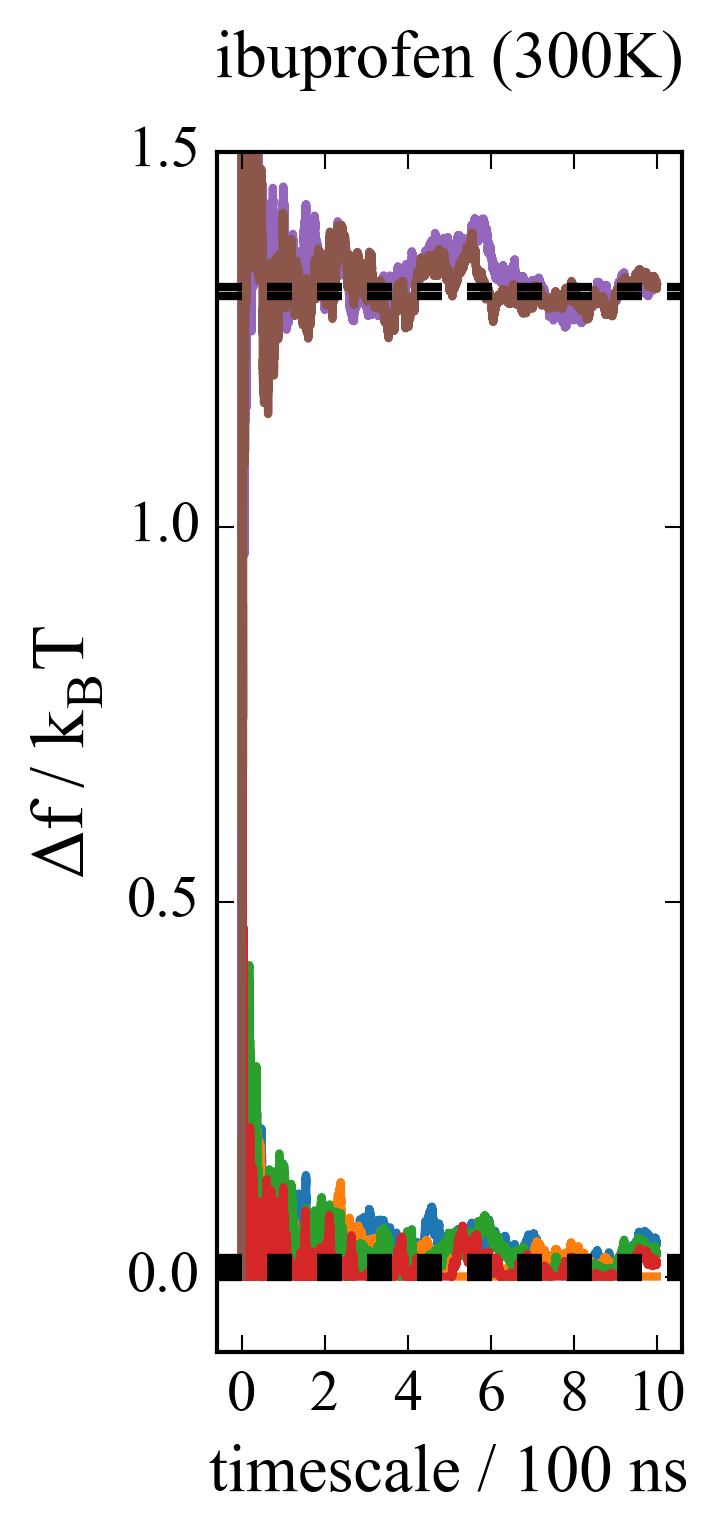

In [24]:
name = 'ibuprofen (300K)'
y_show = [-0.1,1.5]
plt.figure(figsize=(2,5),dpi=300, facecolor="white")
for k in range(n_states):
    plt.plot(delta_f_states_aligned[:,k],
             color=default_colours[k],
            linewidth=2)
pad_x = 30000*2
[plt.plot([-pad_x,n_frames+pad_x],[x]*2,'--',color='black',linewidth=2) for x in delta_f_ground_truth]
plt.xticks([0,200000,400000,600000,800000,1000000,
           ],[0,2,4,6,8,10])
plt.yticks([0.0,0.5,1.0,1.5])
plt.xlabel('timescale / 100 ns', size=16)
plt.ylabel('Δf / $\mathregular{k_B}$T', labelpad=5, size=18)
plt.xlim(-pad_x,n_frames+pad_x)
plt.ylim(y_show[0],y_show[1])
plt.title(name, size=16, pad=18)
plt.show()